<h1>Análisis de datos de Salud</h1>

In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv('Datos\Salud.csv', delimiter=';', decimal=',')

C:\Users\camil\AppData\Local\Temp\ipykernel_18552\4012828647.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Datos\Salud.csv', delimiter=';', decimal=',')


In [25]:
data.shape

(411259, 13)

In [26]:
data.describe()

,Código Departamento,Código Entidad,Dato Cualitativo,Año,Mes
count,411258.000000,411258.000000,0.0,411258.000000,411258.000000
mean,37.693545,38110.612474,NaN,2013.144826,11.908709
std,26.035873,26007.655196,NaN,4.251368,0.288022
min,1.000000,1001.000000,NaN,1998.000000,11.000000
25%,15.000000,15667.000000,NaN,2010.000000,12.000000
50%,25.000000,25807.000000,NaN,2014.000000,12.000000
75%,66.000000,66000.000000,NaN,2017.000000,12.000000
max,99.000000,99773.000000,NaN,2020.000000,12.000000


In [27]:
data.head()

,Código Departamento,Departamento,Código Entidad,Entidad,Dimensión,Subcategoría,Indicador,Dato Numérico,Dato Cualitativo,Año,Mes,Fuente,Unidad de Medida
0,NaN,NaN,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN
1,1.0,Colombia,1001.0,Colombia,Salud,Aseguramiento,Afiliados al régimen contributivo,"19.957.739,00",NaN,2012.0,12.0,Ministerio de Salud y Protección Social,Personas
2,5.0,Antioquia,5000.0,Antioquia,Salud,Aseguramiento,Afiliados al régimen contributivo,"3.220.651,00",NaN,2012.0,12.0,Ministerio de Salud y Protección Social,Personas
3,5.0,Antioquia,5001.0,Medellín,Salud,Aseguramiento,Afiliados al régimen contributivo,"1.673.771,00",NaN,2012.0,12.0,Ministerio de Salud y Protección Social,Personas
4,5.0,Antioquia,5002.0,Abejorral,Salud,Aseguramiento,Afiliados al régimen contributivo,"2.514,00",NaN,2012.0,12.0,Ministerio de Salud y Protección Social,Personas


In [28]:
data.dtypes

Código Departamento    float64
Departamento            object
Código Entidad         float64
Entidad                 object
Dimensión               object
Subcategoría            object
Indicador               object
Dato Numérico           object
Dato Cualitativo       float64
Año                    float64
Mes                    float64
Fuente                  object
Unidad de Medida        object
dtype: object

In [29]:
data.isnull().mean()

Código Departamento    0.000002
Departamento           0.000002
Código Entidad         0.000002
Entidad                0.000002
Dimensión              0.000002
Subcategoría           0.000002
Indicador              0.000000
Dato Numérico          0.192718
Dato Cualitativo       1.000000
Año                    0.000002
Mes                    0.000002
Fuente                 0.000000
Unidad de Medida       0.000002
dtype: float64

In [30]:
data = data.drop(data.index[0])

In [31]:
data = data.drop('Dato Cualitativo', axis=1)

In [32]:
data = data.dropna(how='any', axis=0)

In [33]:
data.isnull().mean()

Código Departamento    0.0
Departamento           0.0
Código Entidad         0.0
Entidad                0.0
Dimensión              0.0
Subcategoría           0.0
Indicador              0.0
Dato Numérico          0.0
Año                    0.0
Mes                    0.0
Fuente                 0.0
Unidad de Medida       0.0
dtype: float64

In [34]:
data['Dato Numérico'] = data['Dato Numérico'].str.replace('.','')

C:\Users\camil\AppData\Local\Temp\ipykernel_18552\3510602877.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dato Numérico'] = data['Dato Numérico'].str.replace('.','')


In [35]:
data['Dato Numérico'] = data['Dato Numérico'].str.replace(',','.')

In [36]:
data['Dato Numérico'] = data['Dato Numérico'].astype('float')

In [37]:
data.shape

(332002, 12)

In [38]:
data.describe()

,Código Departamento,Código Entidad,Dato Numérico,Año,Mes
count,332002.000000,332002.000000,2.155140e+05,332002.000000,332002.000000
mean,37.858670,38271.323576,1.029101e+04,2013.332468,11.889166
std,26.155483,26126.713940,3.544285e+05,4.268398,0.313927
min,1.000000,1001.000000,0.000000e+00,1998.000000,11.000000
25%,15.000000,15686.000000,6.890000e+00,2010.000000,12.000000
50%,25.000000,25839.000000,2.847000e+01,2014.000000,12.000000
75%,66.000000,66001.000000,9.848000e+01,2017.000000,12.000000
max,99.000000,99773.000000,4.705682e+07,2020.000000,12.000000


In [39]:
data['salud_key'] = range(1, len(data) + 1)

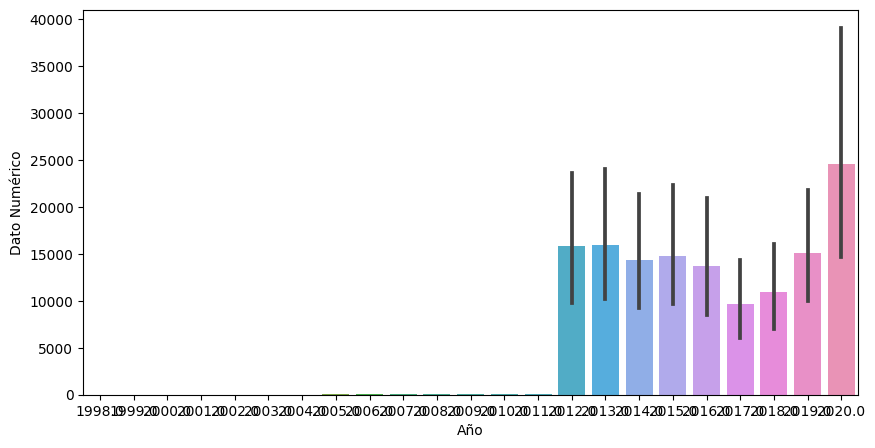

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Año', y='Dato Numérico', data=data)
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
  
# apply normalization techniques
column = 'Dato Numérico'
data[column] = MinMaxScaler().fit_transform(np.array(data[column]).reshape(-1,1))

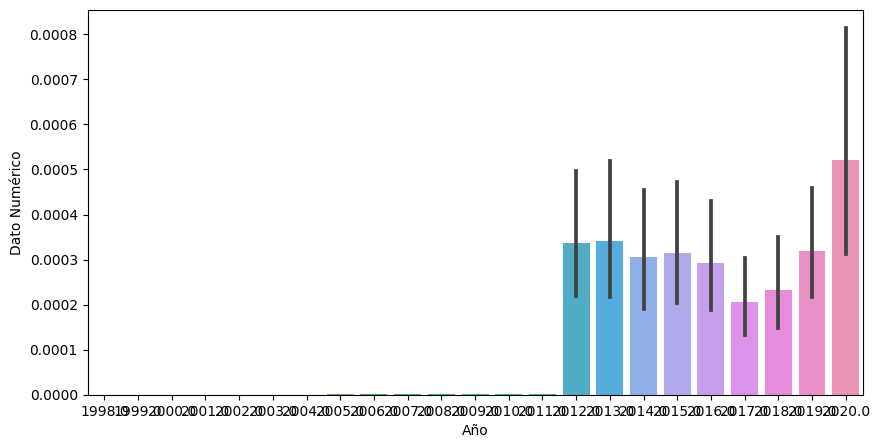

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Año', y='Dato Numérico', data=data)
plt.show()

In [43]:
data.to_csv('Datos/Salud_limpio.csv', index=False, decimal='.', sep=';')